In [ ]:
# NAMA  : ELMIRA FAUSTINA A
# NIM   : 185150200111096

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno
import matplotlib.patches as mpatches
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from matplotlib.pyplot import figure

In [76]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Waffle

Sumber data : https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

Data Preprocessing

In [354]:
df = pd.read_csv('/content/gdrive/My Drive/Big Data Analysis/employee.csv')  

In [355]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Data Cleaning

In [356]:
df.columns = list(map(str, df.columns))
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [357]:
# drop unnecessary columns
df_new = df.drop(['Age', 'Attrition', 'BusinessTravel', 'DailyRate','DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount','EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate','JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
                  'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked','Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
                  'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager'], axis=1)


In [359]:
df_new['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [360]:
RD_income = df_new[df_new['Department'] == 'Research & Development']['MonthlyIncome'].sum()
sales_income = df_new[df_new['Department']== 'Sales']['MonthlyIncome'].sum()
HR_income = df_new[df_new['Department']== 'Human Resources']['MonthlyIncome'].sum()
print(sales_income)
print(RD_income)
print(HR_income)

3103791
6036284
419234


In [361]:
df_income = pd.DataFrame({'Department': ['Research & Development', 'Sales', 'Human Resources'],
                          'MonthlyIncome':[RD_income, sales_income, HR_income]
                          })
df_income

,Department,MonthlyIncome
0,Research & Development,6036284
1,Sales,3103791
2,Human Resources,419234


In [362]:
df_income.set_index('Department', inplace=True)

In [363]:
categories = df_income.index.values
values = df_income['MonthlyIncome']
print(categories)
print("")
print(values)


['Research & Development' 'Sales' 'Human Resources']

Department
Research & Development    6036284
Sales                     3103791
Human Resources            419234
Name: MonthlyIncome, dtype: int64


Determine the Proportion

In [364]:
total_values = sum(df_income['MonthlyIncome'])
category_proportions = [(float(value) / total_values) for value in df_income['MonthlyIncome']]

for i, proportion in enumerate(category_proportions):
  print(df_income.index.values[i] + ': '+ str (proportion))

Research & Development: 0.6314561021094726
Sales: 0.3246877990867332
Human Resources: 0.04385609880379429


In [365]:
width = 40
height = 10

total_num_tiles = width * height

print('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


In [366]:
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

for i, tiles in enumerate(tiles_per_category):
  print(df_income.index.values[i]+": " + str (tiles))

Research & Development: 253
Sales: 130
Human Resources: 18


In [367]:
waffle_chart = np.zeros((height, width))

category_index = 0
tile_index = 0

for col in range (width):
  for row in range(height):
    tile_index +=1
    if tile_index>sum(tiles_per_category[0: category_index]):
      category_index+=1

    waffle_chart[row, col] = category_index

print('Waffle chart populated!')

Waffle chart populated!


In [368]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
   

<Figure size 432x288 with 0 Axes>

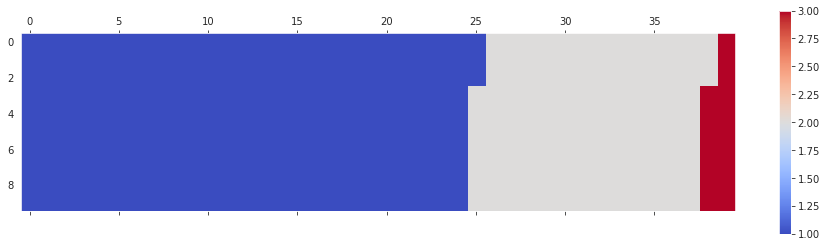

In [369]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], <a list of 0 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

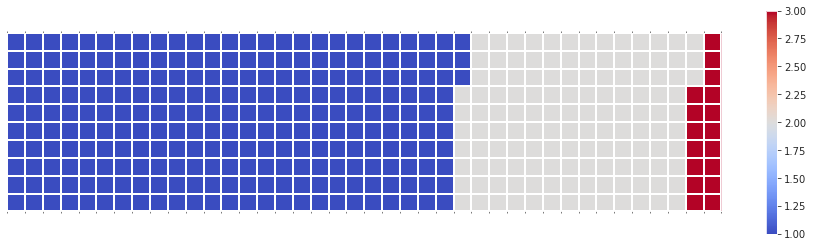

In [370]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

<Figure size 432x288 with 0 Axes>

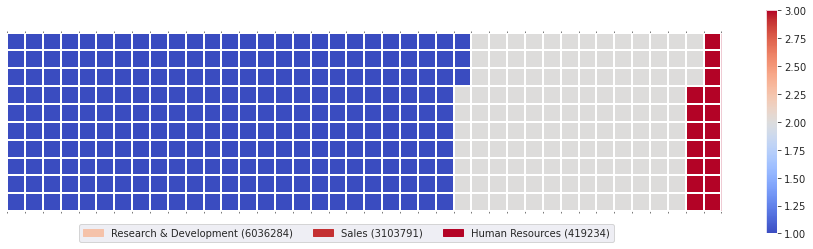

In [374]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

values_cumsum = np.cumsum(df_income['MonthlyIncome'])
total_values = values_cumsum[len(values_cumsum) -1]

legend_handles = []
for i, category in enumerate(df_income.index.values):
  label_str = category +' ('+ str (df_income['MonthlyIncome'][i]) + ')'
  color_val = colormap(float(values_cumsum[i]) / total_values)
  legend_handles.append(mpatches.Patch(color=color_val, label= label_str))

plt.legend(handles=legend_handles,
           loc ='lower center',
           ncol = len(df_income.index.values),
           bbox_to_anchor =(0., -0.2, 0.95, .1)
           )

* Departemen Research & Development (biru) terlihat memiliki proporsi paling banyak (63%) dari total, yang berarti memiliki jumlah Monthly Income atau pendapatan per bulan paling banyak dibandingkan dengan Departemen Sales dan Human Resources, yaitu sebesar $6.036.284

* Sedangkan Departemen Sales (putih) dengan 32% proporsi, menempati total jumlah pendapatan per bulan terbanyak kedua setelah Departemen Research & Development, yaitu total sebesar $3.103.791

* Kemudian, Departemen Human Resources memiliki pendapatan paling rendah di antara departemen Research & Development dan Sales, dengan proporsi 5% dengan total pendapatan per bulan sebesar $419.234 

# Word Cloud

sumber data : https://www.kaggle.com/paultimothymooney/poetry?select=disney.txt (lirik lagu)

In [375]:
# Load Data
text = open('/content/gdrive/My Drive/Dataset/disney.txt', 'r').read()
stopwords = set (STOPWORDS)

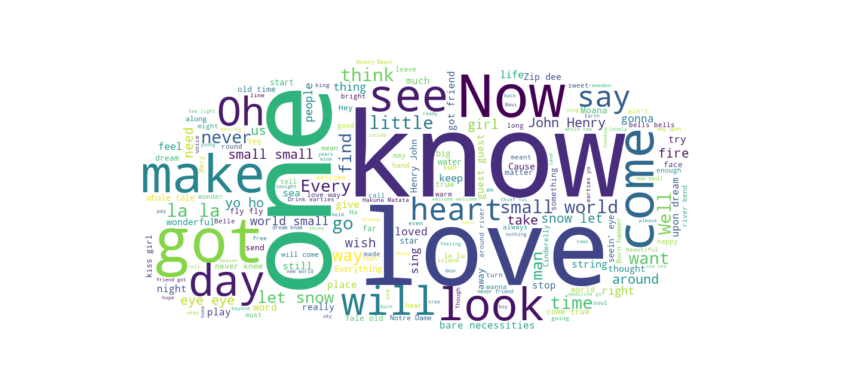

In [376]:
#Load mask/ bentuk khusus untuk tampilan Word Cloud
custom_mask = np.array(Image.open('/content/gdrive/My Drive/Dataset/cloud.png'))

#Memasukkan data ke wordcloud
wc = WordCloud(background_color='white', stopwords=stopwords, mask=custom_mask)
wc.generate(text)
# image_color = ImageColorGenerator(custom_mask)
# wc.recolor(color_func = 
#            image_color)

# atur besar gambar
plt.figure(figsize=(15,10))

#tampilkan
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

* Dari data teks berupa beberapa lirik lagu disney, didapatkan beberapa kata yang tampaknya paling sering digunakan, yaitu kata-kata yang tampak berukuran besar pada word cloud, antara lain 'one', 'love', dan 'know'

* Dari tampilan tersebut dapat disimpulkan bahwa lagu-lagu disney kebanyakan bermakna positif, dan mengangkat tentang cinta. Hal ini dapat dilihat dari pilihan-pilihan kata yang tampak pada word cloud.

#Regresion Plot

Sumber data : https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [377]:
df = pd.read_csv('/content/gdrive/My Drive/Big Data Analysis/employee.csv')

In [378]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [57]:
#mengambil sampel data
employee = df.sample(n = 200, random_state=44)
employee.shape

(200, 35)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



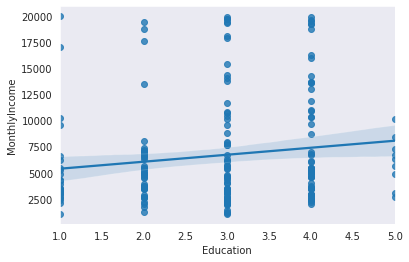

In [379]:
# membuat regression plot dari dua variabel, yakni tingkat pendidikan dan pendapatan bulanan

sns.set_style('dark')
# plt.gca().set (xlim=(1,5))
sns.regplot(employee.Education, employee.MonthlyIncome)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



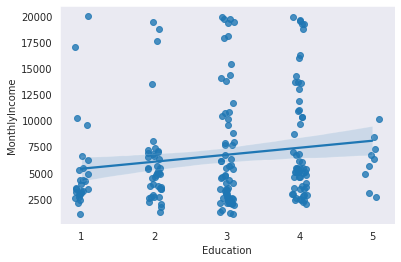

In [380]:
# Karena nampak banyak titik-titik yang terlihat saling bertumpukan di atas titik-titik lain, maka digunakan fungsi jitter

sns.regplot(employee.Education, employee.MonthlyIncome, x_jitter=0.1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



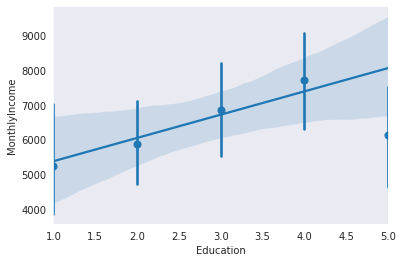

In [381]:
# Dengan jitter, titik-titik data dapat terlihat lebih jelas daripada sebelumnya, yang tertumpuk-tumpuk.

#Selanjutnya, akan dilakukan visualisasi dengan rata-rata data sehingga akan nampak seperti berikut

sns.regplot(employee.Education, employee.MonthlyIncome, x_estimator=np.mean)

* Regression Plot bertujuan untuk melihat hubungan antara dua variabel. Dalam hal ini, yang diamati adalah variabel Education dan Monthly Income.
* Dari hasil regresion plot, terlihat bahwa garis linear mengarah dari kiri bawah ke kanan atas, menunjukkan setiap x-axis bertambah nilainya, y-axis juga ikut bertambah besar nilainya
* Sehingga dapat disimpulkan, bahwa Edukasi berkorelasi positif dengan Monthly Income. Semakin tinggi pendidikan seorang karyawan, maka pendapatan per bulannya akan cenderung semakin tinggi.

#Choropleth

sumber: 

> https://github.com/superpikar/indonesia-geojson.git

> https://id.wikipedia.org/wiki/Provinsi_di_Indonesia



In [383]:
import json
import plotly
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "colab"


Preprocessing

In [384]:
#  Load data geojson
indonesia_province = json.load(open('/content/gdrive/My Drive/Dataset/indonesia.geojson','r'))

In [385]:
indonesia_province['features'][4]

{'geometry': {'coordinates': [[[[105.347542, -1.84469],
     [105.390793, -1.793259],
     [105.394882, -1.735369],
     [105.319389, -1.698463],
     [105.366234, -1.680075],
     [105.344009, -1.64798],
     [105.46991, -1.560391],
     [105.535645, -1.564876],
     [105.562706, -1.528816],
     [105.605141, -1.529878],
     [105.641907, -1.643452],
     [105.72438, -1.643971],
     [105.660316, -1.71436],
     [105.610397, -1.703687],
     [105.652603, -1.71668],
     [105.695358, -1.781209],
     [105.754997, -1.791071],
     [105.743507, -1.775413],
     [105.775452, -1.766819],
     [105.80867, -1.813231],
     [105.871513, -1.798168],
     [105.826805, -1.803413],
     [105.754677, -1.72788],
     [105.740616, -1.68714],
     [105.766945, -1.65139],
     [105.734558, -1.63501],
     [105.7033, -1.527359],
     [105.915688, -1.501259],
     [105.923058, -1.546944],
     [105.981339, -1.5506],
     [106.048759, -1.60039],
     [106.025047, -1.67499],
     [106.186813, -1.895171],


In [389]:
# Mengambil data provinsi di Indonesia dari tabel di halaman wikipedia
dfs = pd.read_html("https://id.wikipedia.org/wiki/Provinsi_di_Indonesia")

In [390]:
# Jumlah tabel yang dideteksi oleh pandas
len(dfs)

12

In [392]:
# Menampilkan tabel yang paling awal dideteksi, dan ternyata merupakan data tabel yang dibutuhkan
dfs[1]

,Pulau,Provinsi,Singkatan ISO[3],Ibu kota,Diresmikan sebagai Provinsi,Populasi(Proyeksi BPS 2020),Luas Total (km²),Populasi / Luas (jiwa / km²),APBD 2020 (miliar rupiah),PDRB 2020 (triliun rupiah),PDRB per kapita 2020 (juta rupiah),IPM 2020,Agama (approx.) 2020
0,Sumatra,Aceh,AC,Banda Aceh,7 Desember 1959,5.371.532,57.95600,91[4],1.727952e+06,16421.00000,3070,71.99[5],Islam 98%
1,Sumatra,Sumatra Utara,SU,Medan,29 November 1956,15.851.851,72.98123,189,8.565530e+00,52377.00000,3805,6868,Islam 64%
2,Sumatra,Sumatra Barat,SB,Padang,9 Agustus 1957,5.131.900,42.01289,121,3.887840e+00,16704.00000,3255,6936,Islam 90%
3,Sumatra,Riau,RI,Pekanbaru,9 Agustus 1957,6.188.442,87.02366,66,9.425830e+00,67969.00000,10983,7033,Islam 91%
4,Sumatra,Kepulauan Riau,KR,Tanjungpinang,25 Oktober 2002,1.917.415,8.20172,237,3.944690e+00,18292.00000,9540,7340,Islam 60%
5,Sumatra,Jambi,JA,Jambi,9 Agustus 1957,3.344.400,50.05816,63,3.548660e+00,15386.00000,4600,6824,Islam 65%
6,Sumatra,Bengkulu,BE,Bengkulu,18 November 1968,1.844.800,19.91933,93,2.012910e+00,4524.00000,2452,6806,Islam 70%
7,Sumatra,Sumatra Selatan,SS,Palembang,14 Agustus 1950,7.941.500,91.59243,93,7.697990e+00,30841.00000,3884,6675,Islam 95%
8,Sumatra,Kepulauan Bangka Belitung,BB,Pangkalpinang,21 November 2000,1.343.900,16.42406,82,2.276180e+00,5639.00000,4196,6827,Islam 63%
9,Sumatra,Lampung,LA,Bandar Lampung,18 Maret 1964,8.026.191,34.62380,227,4.350250e+00,23101.00000,2878,6642,Islam 68%


In [393]:
# Cadangan, menyimpan tabel tersebut ke file csv
dfs[1].to_csv("INAprovince.csv")

In [394]:
#menyimpan data dari wikipedia ke variabel df yang selanjutnya akan diproses
df = dfs[1]

Transformasi

In [395]:
#mengubah format penulisan angka populasi pada dataframe
df['Populasi(Proyeksi BPS 2020)'].apply(lambda x: int (x.replace(".", "")))

0      5371532
1     15851851
2      5131900
3      6188442
4      1917415
5      3344400
6      1844800
7      7941500
8      1343900
9      8026191
10    11704877
11    46029668
12    10012271
13    33522663
14     3553100
15    38610202
16     4104900
17     4773795
18     5036897
19     4716093
20     3922790
21     2439858
22     3351432
23      618384
24     1115633
25     1258090
26     8432163
27     2831283
28     2448081
29     2386604
30     1657409
31     1138667
32      849809
33     3091047
Name: Populasi(Proyeksi BPS 2020), dtype: int64

In [396]:
# Menyimpan hasil transformasi ke dalam kolom baru dan disimpan pada dataframe

df["Populasi"] = df['Populasi(Proyeksi BPS 2020)'].apply(lambda x: int (x.replace(".", "")))

Preprocessing

In [397]:
# Membaca fitur-fitur yang ada pada file geojson
indonesia_province['features'][1]['properties']

{'cartodb_id': 2,
 'country': 'Indonesia',
 'id_1': 31,
 'slug': 'indonesia-sumaterabarat',
 'state': 'Sumatera Barat'}

In [398]:
# mengkaitkan antara kolom nama provinsi dengan nomor id 
state_id_map = {}
for feature in indonesia_province['features']:
  feature['id'] = feature['properties']['id_1']
  state_id_map[feature['properties']['state']] = feature['id']

In [399]:
state_id_map

{'Aceh': 1,
 'Bali': 2,
 'Bangka-Belitung': 3,
 'Banten': 4,
 'Bengkulu': 5,
 'Gorontalo': 6,
 'Irian Jaya Barat': 7,
 'Jakarta Raya': 8,
 'Jambi': 9,
 'Jawa Barat': 10,
 'Jawa Tengah': 11,
 'Jawa Timur': 12,
 'Kalimantan Barat': 13,
 'Kalimantan Selatan': 14,
 'Kalimantan Tengah': 15,
 'Kalimantan Timur': 16,
 'Kepulauan Riau': 18,
 'Lampung': 19,
 'Maluku': 21,
 'Maluku Utara': 20,
 'Nusa Tenggara Barat': 22,
 'Nusa Tenggara Timur': 23,
 'Papua': 24,
 'Riau': 25,
 'Sulawesi Barat': 26,
 'Sulawesi Selatan': 27,
 'Sulawesi Tengah': 28,
 'Sulawesi Tenggara': 29,
 'Sulawesi Utara': 30,
 'Sumatera Barat': 31,
 'Sumatera Selatan': 32,
 'Sumatera Utara': 33,
 'Yogyakarta': 34}

In [400]:
#Karena terdapat perbedaan penulisan penamaan provinsi antara dataframe dengan file geojson, maka dilakukan beberapa transformasi berikut 
# dengan mengubah beberapa isi dataframe dan disesuaikan dengan penulisan pada file geojson sehingga dapat diproses


df['Provinsi'] = df['Provinsi'].apply(lambda x: str (x.replace("Sumatra", "Sumatera")))
df['Provinsi'] = df['Provinsi'].apply(lambda x: str (x.replace("Kepulauan Bangka Belitung", "Bangka-Belitung")))
df['Provinsi'] = df['Provinsi'].apply(lambda x: str (x.replace("DKI Jakarta", "Jakarta Raya")))
df['Provinsi'] = df['Provinsi'].apply(lambda x: str (x.replace("Daerah Istimewa Yogyakarta", "Yogyakarta")))

In [401]:
# membuang sebuah baris data, yaitu Kalimantan Utara. Karena pada file geojson tidak ada.
# Sebenarnya Kalimantan Utara adalah provinsi di Indonesa.
# Namun, karena dari sumber data geojson tidak tercantum, maka dari dataframe harus dihapus

df = df.drop(23)

In [402]:
df['Provinsi'] = df['Provinsi'].apply(lambda x: str (x.replace("Papua Barat", "Irian Jaya Barat")))

In [403]:
# menambahkan kolom baru bernama id untuk menyimpan nilai id dari masing-masing provinsi. Diambil dari file geojson
df['id'] = df['Provinsi'].apply(lambda x: state_id_map[x])

In [404]:
# Cek kolom dataframe
df.head()

,Pulau,Provinsi,Singkatan ISO[3],Ibu kota,Diresmikan sebagai Provinsi,Populasi(Proyeksi BPS 2020),Luas Total (km²),Populasi / Luas (jiwa / km²),APBD 2020 (miliar rupiah),PDRB 2020 (triliun rupiah),PDRB per kapita 2020 (juta rupiah),IPM 2020,Agama (approx.) 2020,Populasi,id
0,Sumatra,Aceh,AC,Banda Aceh,7 Desember 1959,5.371.532,57.95600,91[4],1.727952e+06,16421.0,3070,71.99[5],Islam 98%,5371532,1
1,Sumatra,Sumatera Utara,SU,Medan,29 November 1956,15.851.851,72.98123,189,8.565530e+00,52377.0,3805,6868,Islam 64%,15851851,33
2,Sumatra,Sumatera Barat,SB,Padang,9 Agustus 1957,5.131.900,42.01289,121,3.887840e+00,16704.0,3255,6936,Islam 90%,5131900,31
3,Sumatra,Riau,RI,Pekanbaru,9 Agustus 1957,6.188.442,87.02366,66,9.425830e+00,67969.0,10983,7033,Islam 91%,6188442,25
4,Sumatra,Kepulauan Riau,KR,Tanjungpinang,25 Oktober 2002,1.917.415,8.20172,237,3.944690e+00,18292.0,9540,7340,Islam 60%,1917415,18


In [405]:
df['DensityScale'] = np.log10(df['Populasi'])

In [352]:
fig = px.choropleth_mapbox(df, locations='id', color='DensityScale', geojson=indonesia_province,mapbox_style="carto-positron", zoom=3.5, hover_name= 'Provinsi', hover_data = ['Populasi'], 
                           center= {"lat": 0.7893, "lon": 113.9213})

In [353]:
fig.show()

* Dari data populasi di setiap Provinsi di Indonesia di atas, skala warna tersebut menunjukkan seberapa padat populasi di tiap Provinsi. Semakin gelap warnanya, semakin sedikit populasi penduduknya. Semakin kuning atau semakin cerah warnanya, maka semakin padat populasi penduduknya.

* Pulau jawa terlihat memiliki populasi paling padat diantara lainnya, khususnya Provinsi Jawa Timur, Jawa Tengah, dan Jawa Barat. Namun, masih di pulau Jawa, Provinsi Banten dan Yogyakarta terlihat memiliki populasi penduduk yang sedikit lebih *longgar * daripada Jabar, Jateng, dan Jatim.

* Sebaliknya, Provinsi-Provinsi seperti Irian Jaya Barat, Maluku Utara, Gorontalo, dan Sulawesi Barat tampak berwarna biru tua gelap, menandakan populasi penduduknya memiliki tingkat kepadatan yang paling rendah jika dibandingkan dengan Provinsi-Provinsi lainnya.